## Atividade 14 - Pi pelo método de Monte Carlo

### Parte 1: Implementação Sequencial

In [6]:
import matplotlib.pyplot as plt
import numpy as np

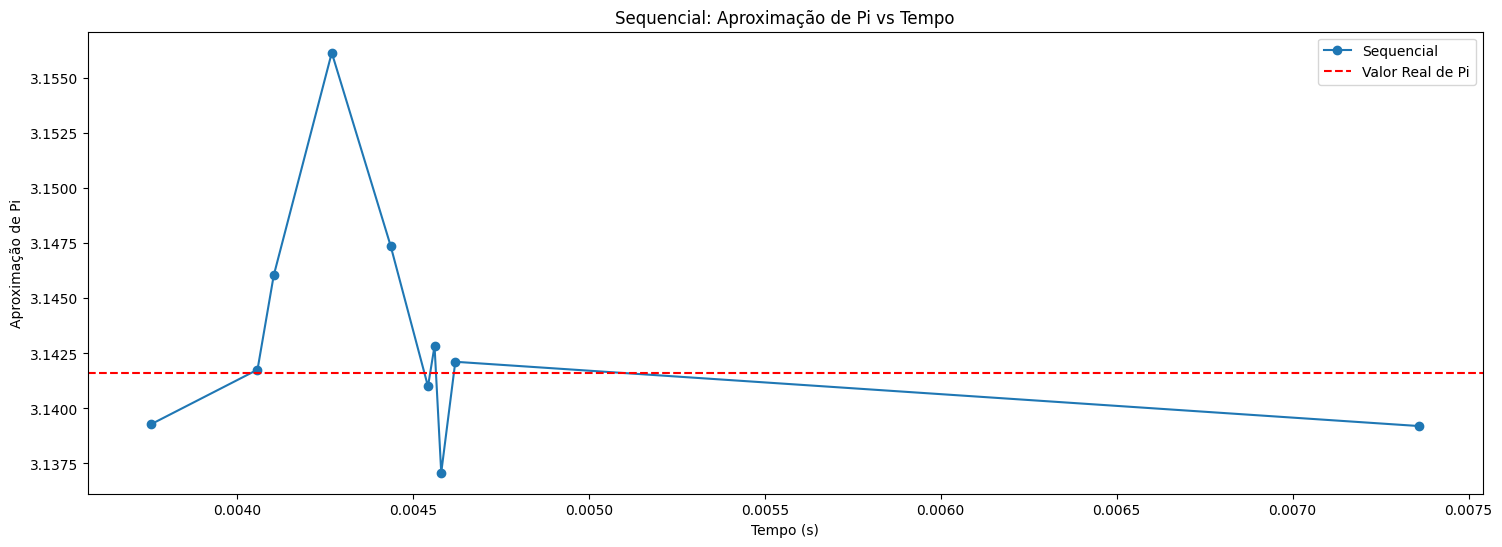

In [7]:
sequencial_aprox = [3.1392, 3.13928, 3.14212, 3.14176, 3.14284, 3.1474, 3.14604, 3.13708, 3.15616, 3.141]
sequencial_tempo = [0.0073596, 0.0037559, 0.0046208, 0.0040587, 0.0045618, 0.0044368, 0.0041048, 0.0045808, 0.0042698, 0.0045432]

def ordenar_por_tempo(tempos, aproximacoes):
    indices_ordenados = np.argsort(tempos)
    tempos_ordenados = np.array(tempos)[indices_ordenados]
    aproximacoes_ordenadas = np.array(aproximacoes)[indices_ordenados]
    return tempos_ordenados, aproximacoes_ordenadas

# Ordena os dados de cada implementação
sequencial_tempo_ordenado, sequencial_aprox_ordenado = ordenar_por_tempo(sequencial_tempo, sequencial_aprox)

# Valor real de pi
pi_real = np.pi

# Criação dos gráficos para cada implementação
plt.figure(figsize=(18, 6))

# Gráfico para a implementação sequencial
plt.plot(sequencial_tempo_ordenado, sequencial_aprox_ordenado, 'o-', label='Sequencial')
plt.axhline(y=pi_real, color='r', linestyle='--', label='Valor Real de Pi')
plt.title('Sequencial: Aproximação de Pi vs Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Aproximação de Pi')
plt.legend()

A geração de números aleatórios foi feita usando uma função que gera números aleatórios entre 0 e 1 e assim, eram geradas coordenadas x e y com essa função. E assim foi testado se esse ponto gerado está dentro do círculo, que nesse caso, por questão de simplificação matemática, é um círculo de raio 1 com centro localizado na origem (0,0). Através da fórmula que define se um ponto está dentro de uma circunferência da geometria analítica, (x ** 2 + y ** 2 = r ** 2), foi verificado se o ponto gerado aleatoriamente pertencia ou não à circunferência. Além disso, a função srand foi usada para gerar uma semente para haver um ponto de ínicio menor que 1 para o ínicio da geração de números aleatórios.

### Parte 2: Primeira Tentativa de Paralelização

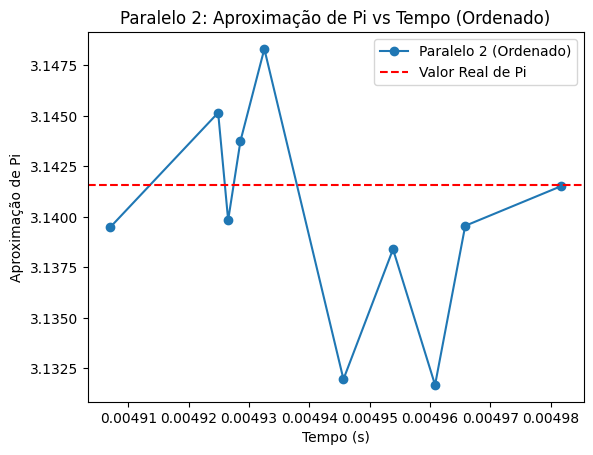

In [14]:
paralelo1_aprox = [3.14832, 3.14516, 3.13948, 3.13956, 3.14376, 3.14152, 3.1384, 3.13984, 3.13168, 3.13196]
paralelo1_tempo = [0.00493254, 0.00492488, 0.00490696, 0.00496585, 0.00492858, 0.00498173, 0.00495388, 0.00492654, 0.00496085, 0.00494566]

paralelo1_tempo_ordenado, paralelo1_aprox_ordenado = ordenar_por_tempo(paralelo1_tempo, paralelo1_aprox)

plt.plot(paralelo1_tempo_ordenado, paralelo1_aprox_ordenado, 'o-', label='Paralelo 2 (Ordenado)')
plt.axhline(y=pi_real, color='r', linestyle='--', label='Valor Real de Pi')
plt.title('Paralelo 2: Aproximação de Pi vs Tempo (Ordenado)')
plt.xlabel('Tempo (s)')
plt.ylabel('Aproximação de Pi')
plt.legend()

Nessa abordagem foi notado que existe maiores problemas para geração de números aleatórios, isso porque apareceram por mais de uma vez números repetidos e 2 vezes números fora do escopo solicitado (números entre 0 e 1). Como as várias threads estão acessando a função rand() simulaneamente, chamadas consecutivas da função podem gerar número que não são de fato independentes, o que pode resultar em números iguais. Além disso, como a semente é a mesma para todas as threads, pode ser que ao final a sequência gerada não seja de fato aleatória, já que a base para geração é a mesma. Isso pode ter sido refletido nas aproximações de PI, que se distanciaram mais do valor real de PI, do que por exemplo a implementação sequencial. E o tempo pode não ter sido tão bom já que com a redução da variável sum, uma cópia é feita para cada thread e depois a soma de cada cópia deve ser feita, consumindo algum tempo de execução do algoritmo.

### Parte 3: Melhorando a Paralelização

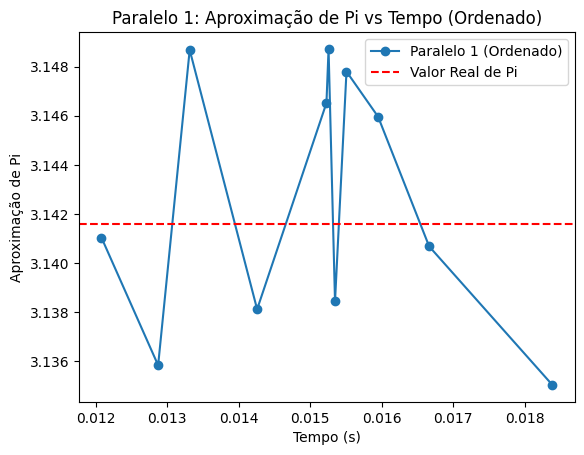

In [15]:
paralelo2_aprox = [3.13844, 3.13812, 3.14104, 3.1478, 3.14068, 3.14652, 3.13584, 3.14596, 3.14868, 3.14872, 3.13504]
paralelo2_tempo = [0.0153479, 0.0142588, 0.012082, 0.0155083, 0.0166643, 0.0152282, 0.0128746, 0.0159503, 0.0133159, 0.0152577, 0.018387]

paralelo2_tempo_ordenado, paralelo2_aprox_ordenado = ordenar_por_tempo(paralelo2_tempo, paralelo2_aprox)

plt.plot(paralelo2_tempo_ordenado, paralelo2_aprox_ordenado, 'o-', label='Paralelo 1 (Ordenado)')
plt.axhline(y=pi_real, color='r', linestyle='--', label='Valor Real de Pi')
plt.title('Paralelo 1: Aproximação de Pi vs Tempo (Ordenado)')
plt.xlabel('Tempo (s)')
plt.ylabel('Aproximação de Pi')
plt.legend()

### Conclusão

Como é possível perceber através do gráfico as aproximações de PI geradas por essa implementação é mais precisa e mais rápida que a anterior. Uma hipótese que isso acontece principalmente porque a semente para cada thread não é a mesma, cada uma tem sua própria baseada no número da thread. Assim como a base para geração da sequência de números aleatórios não é a mesma, não houveram, por exemplo, números repetidos. Além disso a melhoria do tempo indica que essa mudança também aumentou a eficácia do algoritmo de geração de números aleatórios.

In [16]:

sequencial_aprox = [3.1392, 3.13928, 3.14212, 3.14176, 3.14284, 3.1474, 3.14604, 3.13708, 3.15616, 3.141]
sequencial_tempo = [0.0073596, 0.0037559, 0.0046208, 0.0040587, 0.0045618, 0.0044368, 0.0041048, 0.0045808, 0.0042698, 0.0045432]

paralelo2_aprox = [3.13844, 3.13812, 3.14104, 3.1478, 3.14068, 3.14652, 3.13584, 3.14596, 3.14868, 3.14872, 3.13504]
paralelo2_tempo = [0.00493254, 0.00492488, 0.00490696, 0.00496585, 0.00492858, 0.00498173, 0.00495388, 0.00492654, 0.00496085, 0.00494566]

paralelo1_aprox = [3.14832, 3.14516, 3.13948, 3.13956, 3.14376, 3.14152, 3.1384, 3.13984, 3.13168, 3.13196]
paralelo1_tempo = [0.0153479, 0.0142588, 0.012082, 0.0155083, 0.0166643, 0.0152282, 0.0128746, 0.0159503, 0.0133159, 0.0152577, 0.018387]

def calcular_estatisticas(aproximacoes, tempos):
    media_aprox = np.mean(aproximacoes)
    variancia_aprox = np.var(aproximacoes)
    media_tempo = np.mean(tempos)
    return media_aprox, variancia_aprox, media_tempo

sequencial_stats = calcular_estatisticas(sequencial_aprox, sequencial_tempo)
paralelo1_stats = calcular_estatisticas(paralelo1_aprox, paralelo1_tempo)
paralelo2_stats = calcular_estatisticas(paralelo2_aprox, paralelo2_tempo)

import pandas as pd

dados_tabela = {
    "Implementação": ["Sequencial", "Paralelo 1", "Paralelo 2"],
    "Média Aproximação de Pi": [sequencial_stats[0], paralelo1_stats[0], paralelo2_stats[0]],
    "Variância Aproximação de Pi": [sequencial_stats[1], paralelo1_stats[1], paralelo2_stats[1]],
    "Tempo Médio de Execução (s)": [sequencial_stats[2], paralelo1_stats[2], paralelo2_stats[2]],
    "Diferença para Pi": [np.pi - sequencial_stats[0], np.pi - paralelo1_stats[0], np.pi - paralelo2_stats[0]]
}

tabela_resultados = pd.DataFrame(dados_tabela)
tabela_resultados


,Implementação,Média Aproximação de Pi,Variância Aproximação de Pi,Tempo Médio de Execução (s),Diferença para Pi
0,Sequencial,3.143288,0.000027,0.004629,-0.001695
1,Paralelo 1,3.139968,0.000025,0.014989,0.001625
2,Paralelo 2,3.142440,0.000025,0.004943,-0.000847


1. Não observei melhoria, já que o tempo de execução foi menor para a implementação sequencial, especialmente em relação sobre a primeira implementação paralela.

2. Sim, todas as versões está precisa em pelo menos 2 casas decimais.

3. O maior desafio foi em relação às sementes, para que eles fossem verdadeiramente aleatórios.

4. Neste desafio específico eu não consigo enxergar benefícios tão claros em relação ao uso de threads.
